In [76]:
import torch as tc
from torch import optim, nn 
from torch.utils.data import DataLoader, TensorDataset, random_split 

from torchmetrics import Accuracy

import numpy as np 
import pandas as pd 
import  matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from tqdm import tqdm 

In [77]:
data = pd.read_csv('/home/ahmadrezabaqerzadeh/datasets/weekly-a-p/data.csv').iloc[0:20000]

In [78]:
data.shape

(20000, 56)

In [79]:
data.isnull().sum()

ticker         0
date           0
fwd_returns    0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
32             0
33             0
34             0
35             0
36             0
37             0
38             0
39             0
40             0
41             0
42             0
43             0
44             0
45             0
46             0
47             0
48             0
49             0
50             0
51             0
52             0
label          0
dtype: int64

In [80]:
data.drop(['ticker', 'date'], axis = 1, inplace = True)

In [81]:
data

,fwd_returns,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,label
0,-0.005642,-0.003846,0.003413,-0.019071,-0.009660,0.008286,0.029636,-0.022817,0.005885,0.010706,...,0.002131,0.025218,0.019846,0.015005,0.021630,-0.021976,0.014586,0.053336,-0.011001,0
1,-0.010648,0.029965,0.000784,0.041012,0.009267,0.024689,0.034265,-0.034352,-0.002313,-0.084328,...,-0.013430,0.009903,0.053175,-0.058573,-0.021875,0.007345,0.031162,-0.010281,-0.036922,0
2,-0.010184,0.090171,-0.052591,-0.005359,0.105501,-0.027702,-0.003553,0.004392,-0.069239,-0.084230,...,0.009283,-0.103827,0.004009,-0.019974,0.007588,-0.054290,0.038561,-0.035324,-0.007138,0
3,-0.001361,0.044034,-0.014006,-0.017882,0.013947,0.040639,0.019231,-0.018868,-0.010057,0.005780,...,0.004367,0.000000,0.010294,-0.028571,0.070336,-0.006079,0.006116,-0.010590,-0.006015,0
4,-0.008553,-0.001490,0.003888,0.010375,0.112630,-0.000448,0.099114,-0.007090,-0.001587,-0.055888,...,-0.026303,-0.015056,0.007988,-0.009856,-0.041574,-0.018823,0.030419,0.003016,-0.010358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
19996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
19997,-0.047503,0.006127,0.016189,0.016456,0.046358,0.060393,0.030391,0.035982,-0.057910,-0.034765,...,0.017266,0.034226,-0.030303,0.079439,-0.024316,0.029734,0.050987,0.206349,-0.019455,0
19998,0.005767,0.005477,0.065934,0.012870,0.011968,-0.009069,-0.030108,0.015808,-0.014395,0.039613,...,-0.001577,0.038777,-0.043864,0.082533,-0.026953,-0.007100,-0.025027,-0.027447,-0.107671,1


In [82]:
x = data.drop('label', axis = 1)
y = data['label']

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [84]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((14000, 53), (6000, 53), (14000,), (6000,))

In [85]:
xtest, xvalid, ytest, yvalid = train_test_split(xtest, ytest, test_size = 0.5, random_state = 42)

In [86]:
xtest.shape, xvalid.shape, ytest.shape, yvalid.shape

((3000, 53), (3000, 53), (3000,), (3000,))

In [87]:
xtrain = tc.FloatTensor(np.array(xtrain))
ytrain = tc.FloatTensor(np.array(ytrain))

xtest = tc.FloatTensor(np.array(xtest))
ytest = tc.FloatTensor(np.array(ytest))

xvalid = tc.FloatTensor(np.array(xvalid))
yvalid = tc.FloatTensor(np.array(yvalid))

In [88]:
mean = xtrain.mean(dim = 0)
std = xtrain.std(dim = 0)

In [89]:
xtrain = (xtrain - mean)/std 
xtest = (xtest - mean)/std 
xvalid = (xvalid - mean)/std

In [90]:
train_dataset = TensorDataset(xtrain, ytrain)
valid_dataset = TensorDataset(xvalid, yvalid)

In [91]:
train_loader = DataLoader(train_dataset, batch_size = 256, shuffle = True)
valid_loader = DataLoader(valid_dataset, batch_size = 512, shuffle = False)


In [92]:
class RNNModel(nn.Module):
    
    def __init__(self, input_size, hidden_size, layer, bidirectional):
        super().__init__()
        
        self.rnn = nn.RNN(input_size, hidden_size = hidden_size, num_layers = layer, bidirectional = bidirectional)
    
        self.fc = nn.LazyLinear(1)
        
    def forward(self, x):
        
        y, hidden_state = self.rnn(x)
        
        y = self.fc(y)
        
        return y

In [93]:
model = RNNModel(53, 64, 1, False)

/home/ahmadrezabaqerzadeh/.local/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [94]:
x, y = next(iter(train_loader))

In [95]:
model(x).shape

torch.Size([256, 1])

In [96]:
device = 'cuda' if tc.cuda.is_available() else 'cpu'

In [97]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [107]:
def train_one_epoch(model, train_loader, loss_func, optimizer, epoch):
    
    train_loss = AverageMeter()
    train_acc = Accuracy(task = 'binary').to(device)
    
    with tqdm(train_loader, unit = 'batch') as tepoch:
        
        if epoch is not None:
            tepoch.set_description(f'Epoch={epoch}')
        
        for x, y in tepoch:
            
            x = x.to(device)
            y = y.to(device)
            
            yp = model(x)
            loss = loss_func(yp.squeeze(), y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_loss.update(loss.item())
            train_acc(yp.squeeze(), y)
            
            tepoch.set_postfix(loss = train_loss.avg, accuracy = train_acc.compute().item() * 100)
            
    return model, train_loss.avg, train_acc.compute().item()

In [99]:
def validation(model, valid_loaedr, loss_func):
    model.eval()

    valid_loss=AverageMeter()
    valid_acc=Accuracy(task='binary').to(device)

    for x, y in valid_loaedr:

        x=x.to(device)
        y=y.to(device)

        yp=model(x)
        loss=loss_func(yp.squeeze(), y)

        valid_loss.update(loss.item())
        valid_acc(yp.squeeze(), y)

    print(f'valid loss={valid_loss.avg:.4}, accuracy={valid_acc.compute() * 100 :.4}')
    print()

    return valid_loss.avg, valid_acc.compute().item()

In [100]:
model = model.to(device)

In [265]:
optimizer = optim.Adam(model.parameters(), lr = 0.01, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [266]:
train_one_epoch(model, train_loader, loss_func, optimizer, 1)

100%|██████████| 2918/2918 [01:00<00:00, 48.16batch/s, accuracy=tensor(97.6704), loss=0.0548]


(RNNModel(
   (rnn): RNN(53, 64)
   (fc): Linear(in_features=64, out_features=1, bias=True)
 ),
 0.05483221114433426,
 tensor(0.9767))

In [132]:
model = RNNModel(53, 128, 2, False).to(device)

In [133]:
optimizer = optim.Adam(model.parameters(), lr = 0.002, betas = [0.9, 0.99])
loss_func = nn.BCEWithLogitsLoss()

In [134]:
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

best_loss = tc.inf 
best_model = [0]

In [135]:
N = 25
for i in range(N):

  model, train_loss, train_acc = train_one_epoch(model, train_loader, loss_func, optimizer, i)
  valid_loss, valid_acc = validation(model,valid_loader,loss_func)

  acc_train_hist.append(train_acc)
  loss_train_hist.append(train_loss)

  acc_valid_hist.append(valid_acc)
  loss_valid_hist.append(valid_loss)

  if valid_loss<best_loss:
    best_loss = valid_loss
    best_model[0] == model
    print('model saved!')

Epoch=0: 100%|██████████| 55/55 [00:02<00:00, 26.05batch/s, accuracy=82.4, loss=0.392]


valid loss=0.2027, accuracy=92.5

model saved!


Epoch=1: 100%|██████████| 55/55 [00:02<00:00, 22.45batch/s, accuracy=93, loss=0.174]  


valid loss=0.1563, accuracy=93.7

model saved!


Epoch=2: 100%|██████████| 55/55 [00:02<00:00, 23.62batch/s, accuracy=94.8, loss=0.133]


valid loss=0.1651, accuracy=93.57



Epoch=3: 100%|██████████| 55/55 [00:02<00:00, 25.09batch/s, accuracy=95.7, loss=0.112]


valid loss=0.118, accuracy=95.63

model saved!


Epoch=4: 100%|██████████| 55/55 [00:02<00:00, 26.28batch/s, accuracy=96.3, loss=0.0962]


valid loss=0.1551, accuracy=94.33



Epoch=5: 100%|██████████| 55/55 [00:02<00:00, 25.67batch/s, accuracy=96.4, loss=0.0935]


valid loss=0.09299, accuracy=96.43

model saved!


Epoch=6: 100%|██████████| 55/55 [00:02<00:00, 24.41batch/s, accuracy=96.9, loss=0.0838]


valid loss=0.1057, accuracy=96.3



Epoch=7: 100%|██████████| 55/55 [00:02<00:00, 24.17batch/s, accuracy=96.8, loss=0.0852]


valid loss=0.09779, accuracy=96.3



Epoch=8: 100%|██████████| 55/55 [00:02<00:00, 23.53batch/s, accuracy=97, loss=0.0776]  


valid loss=0.07986, accuracy=96.87

model saved!


Epoch=9: 100%|██████████| 55/55 [00:02<00:00, 25.78batch/s, accuracy=97.7, loss=0.0632]


valid loss=0.07311, accuracy=97.17

model saved!


Epoch=10: 100%|██████████| 55/55 [00:01<00:00, 30.24batch/s, accuracy=97.5, loss=0.0652]


valid loss=0.07221, accuracy=97.07

model saved!


Epoch=11: 100%|██████████| 55/55 [00:01<00:00, 29.34batch/s, accuracy=97.3, loss=0.0718]


valid loss=0.08308, accuracy=96.97



Epoch=12: 100%|██████████| 55/55 [00:02<00:00, 26.38batch/s, accuracy=98, loss=0.0536]  


valid loss=0.0563, accuracy=97.9

model saved!


Epoch=13: 100%|██████████| 55/55 [00:02<00:00, 24.95batch/s, accuracy=97.9, loss=0.0576]


valid loss=0.06625, accuracy=97.4



Epoch=14: 100%|██████████| 55/55 [00:02<00:00, 24.45batch/s, accuracy=98, loss=0.0528]  


valid loss=0.05505, accuracy=97.73

model saved!


Epoch=15: 100%|██████████| 55/55 [00:02<00:00, 25.17batch/s, accuracy=98.4, loss=0.0429]


valid loss=0.06152, accuracy=97.8



Epoch=16: 100%|██████████| 55/55 [00:02<00:00, 24.14batch/s, accuracy=98.3, loss=0.0494]


valid loss=0.0702, accuracy=97.6



Epoch=17: 100%|██████████| 55/55 [00:02<00:00, 25.19batch/s, accuracy=98.2, loss=0.0493]


valid loss=0.07482, accuracy=97.33



Epoch=18: 100%|██████████| 55/55 [00:02<00:00, 24.32batch/s, accuracy=98.2, loss=0.0453]


valid loss=0.0728, accuracy=97.27



Epoch=19: 100%|██████████| 55/55 [00:02<00:00, 25.38batch/s, accuracy=98.4, loss=0.0433]


valid loss=0.05234, accuracy=98.1

model saved!


Epoch=20: 100%|██████████| 55/55 [00:02<00:00, 24.55batch/s, accuracy=98.6, loss=0.0376]


valid loss=0.05344, accuracy=98.17



Epoch=21: 100%|██████████| 55/55 [00:02<00:00, 24.94batch/s, accuracy=98.7, loss=0.0352]


valid loss=0.04424, accuracy=98.47

model saved!


Epoch=22: 100%|██████████| 55/55 [00:02<00:00, 25.03batch/s, accuracy=98.8, loss=0.0333]


valid loss=0.04737, accuracy=98.17



Epoch=23: 100%|██████████| 55/55 [00:02<00:00, 25.60batch/s, accuracy=98.7, loss=0.0371]


valid loss=0.03766, accuracy=98.33

model saved!


Epoch=24: 100%|██████████| 55/55 [00:02<00:00, 25.35batch/s, accuracy=98.8, loss=0.0317]


valid loss=0.05712, accuracy=98.07



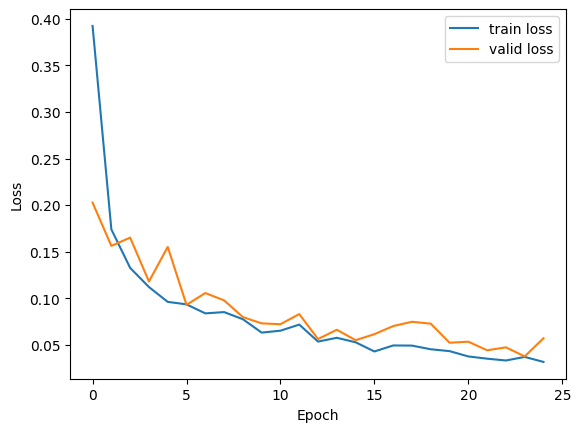

In [136]:
plt.plot(range(N), loss_train_hist, label='train loss')
plt.plot(range(N), loss_valid_hist, label='valid loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()

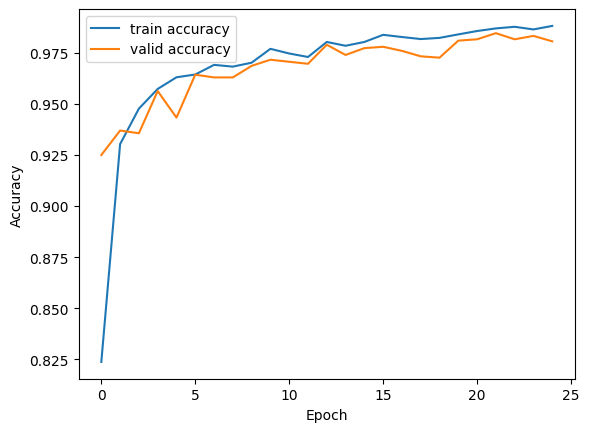

In [137]:
plt.plot(range(N), acc_train_hist, label='train accuracy')
plt.plot(range(N), acc_valid_hist, label='valid accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.yticks(np.arange(0,1,0.1))
plt.legend()
plt.show()